# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [6]:
# YOUR CODE HERE

df = pd.read_csv("iris.tsv.gz", sep="\t")
df.sample(10, random_state=42)

,sepal-length,sepal-width,petal-length,petal-width,target
73,4.4,3.2,1.3,0.2,0
18,6.3,2.9,5.6,1.8,2
118,5.7,4.4,1.5,0.4,0
78,5.9,3.0,5.1,1.8,2
76,7.6,3.0,6.6,2.1,2
31,5.8,2.8,5.1,2.4,2
64,7.2,3.6,6.1,2.5,2
141,5.4,3.0,4.5,1.5,1
68,5.8,2.6,4.0,1.2,1
82,5.8,2.7,4.1,1.0,1


Using Pandas in python, I loaded the Iris Data set given the PMLB copy, and using tab separation. 
.sample then chose 10 random rows of data from the dataset. The random_state=42 sets a specific part for the random number generator and ensures that the results of a random process are the same every time the code is run. This was so I always saw the same random 10 rows, but I can take this out and get a new random 10 rows every time I run the code.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [7]:
# YOUR CODE HERE

df.columns.tolist()

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']

There are 5 columns in the iris.tsv.gz dataset. The first, 'sepal-length', is the length of the flower's outer petal part (sepal) measured in centimeters. The second, 'sepal-width', is the width of the sepal in centimeters. The third, 'petal-length', is the length of the flower's petal (inner, colorful part) measured in centimeters. The fouth, 'petal-width', is the width of the petal in centimeters. Finally, the fifth column, 'target', is the type of iris flower the row of measurements belong to - iris setosa, iris versicolor, or iris virginica. 

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

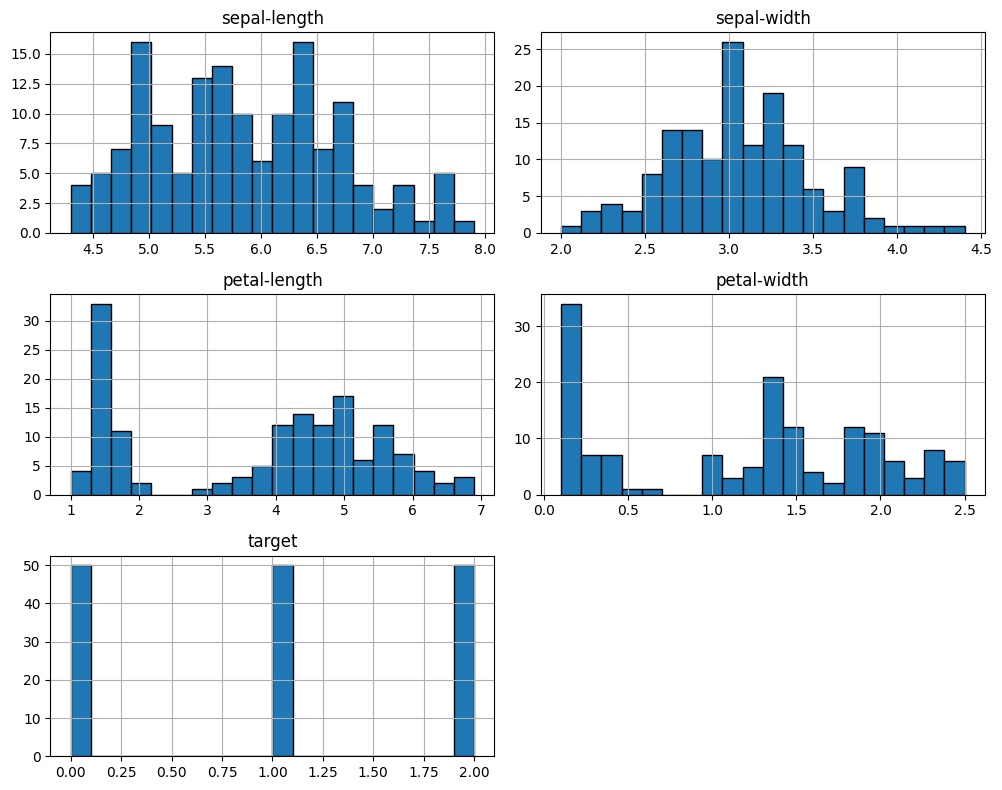

In [8]:
# YOUR CODE HERE

df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

sepal-length best fits the right-skewed distribution from class. It has most data points clustered on the left and center, with much fewer data points skewing off on the right side.

sepal-width best fits the normal distribution. It is symmetric, and has a bell shape where the data is evenly distributed on both sides of the peak in the center.

petal-length best fits the bimodal distribution, with two distinct peaks.

petal-width best fits the multimodal distribution, having more than two peaks so multiple subgroups within the data.

Finally, the target histograms best fits technically the multimodal distribution, with three peaks due to the fact that there are only three possible data points for the column.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

/tmp/ipykernel_5333/1505037386.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df[output_col].unique())


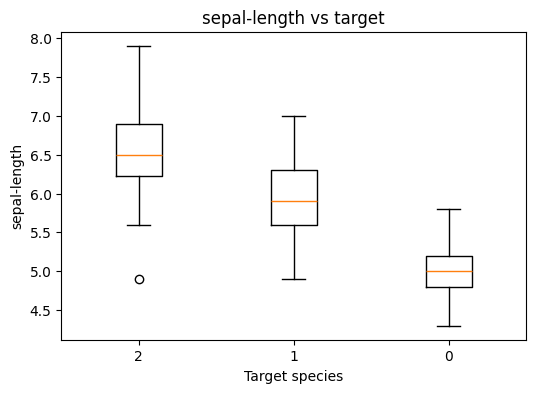

/tmp/ipykernel_5333/1505037386.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df[output_col].unique())


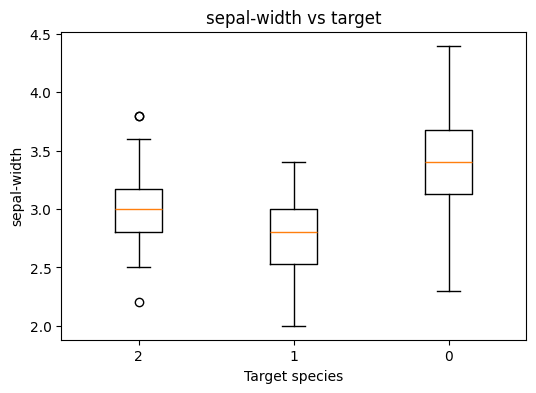

/tmp/ipykernel_5333/1505037386.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df[output_col].unique())


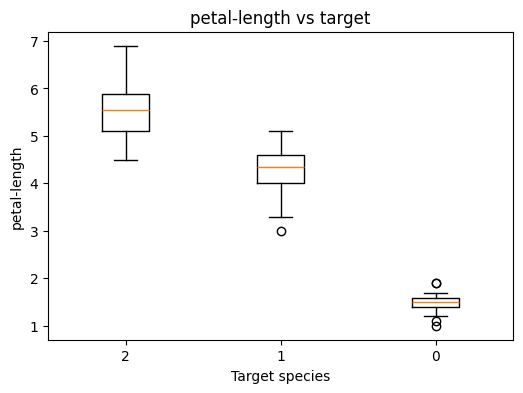

/tmp/ipykernel_5333/1505037386.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df[output_col].unique())


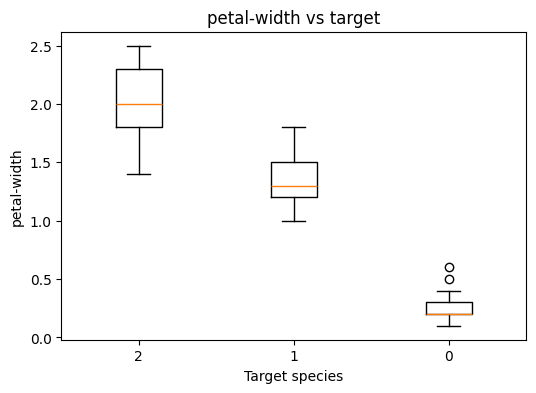

In [10]:
# YOUR CODE HERE

input_cols = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
output_col = "target"
for col in input_cols:
    plt.figure(figsize=(6, 4))
    groups = [df[df[output_col] == t][col] for t in df[output_col].unique()]
    plt.boxplot(groups, labels=df[output_col].unique())
    plt.title(f"{col} vs {output_col}")
    plt.xlabel("Target species")
    plt.ylabel(col)
    plt.show()

Based on these boxplots, each comparing an input measurement to the species label, we can figure out which are independent or not. Sepal-length vs target species is not independent, because target species value of 0 (iris setosa) shows noticeably shorter sepal lengths, which the other two are progressively larger. Sepal-width vs target species is also not independent, because but a weaker independence. There is a lot of overlap, but we can tell that target = 0 has widest sepals, while target = 1 has the narrowest. Petal-length vs target species is very not independent. It is clear from the boxplot that target species = 2 has the largest length, while target species = 0 has significantly smaller length. Finally, petal-width vs target species is also not independent. Target = 2 has the thickest petals, while target species = 0 has the tinnest.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error:  0.046385088311226945


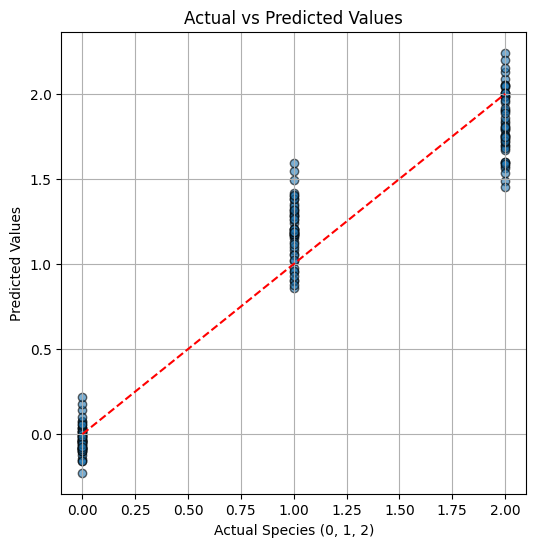

In [11]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression

X = df[["sepal-length", "sepal-width", "petal-length", "petal-width"]]
y = df["target"].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
m = np.mean((y - y_pred) ** 2)
print("Mean Squared Error: ", m)

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.6, edgecolor='black')
plt.plot([0, 2], [0, 2], "r--")
plt.xlabel("Actual Species (0, 1, 2)")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

The predicted values clustering near the line y=x are fairly close together because the regression fits well. Points close to the line show low error. The mean squared error or 0.046385 is a very small error. Taking the square root, 0.215, means that the model's predictions are about 0.215 units away from the true value.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [12]:
# YOUR CODE HERE

X = df[["sepal-length"]]
y = df["target"].values
model1 = LinearRegression()
model1.fit(X, y)
y_pred = model1.predict(X)
m_1 = np.mean((y - y_pred) ** 2)
print("Mean squared error (sepal-length only): ", m_1)

N = df[["sepal-width"]]
x = df["target"].values
model2 = LinearRegression()
model2.fit(N, x)
x_pred = model2.predict(N)
m_2 = np.mean((y - y_pred) ** 2)
print("Mean squared error (sepal-width only): ", m_2)

L = df[["petal-length"]]
c = df["target"].values
model3 = LinearRegression()
model3.fit(L, c)
c_pred = model3.predict(L)
m_3 = np.mean((c - c_pred) ** 2)
print("Mean squared error (petal legth only): ", m_3)

P = df[["petal-width"]]
t = df["target"]
model4 = LinearRegression()
model4.fit(P, t)
t_pred = model4.predict(P)
m_4 = np.mean((t - t_pred) ** 2)
print("Mean squared error (petal width only): ", m_4)

Mean squared error (sepal-length only):  0.2583986123119253
Mean squared error (sepal-width only):  0.2583986123119253
Mean squared error (petal legth only):  0.06621216537347081
Mean squared error (petal width only):  0.05678463583919234


The petal-width input column gives the best linear model of the target on its own. Going through individual linear models, the lowest mean squared error is the input column with the best linear model. That is the petal-width column. This is still slightly higher than the linear model involving all the input columns in question 5.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

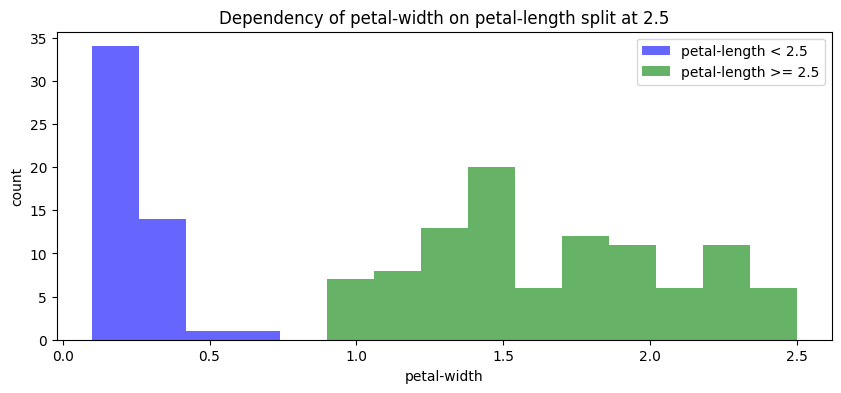

In [16]:
# YOUR CODE HERE

x_col = "petal-length"
y_col = "petal-width"

t = 2.5
group1 = df[df[x_col] < t][y_col]
group2 = df[df[x_col] >= t][y_col]

plt.figure(figsize=(10, 4))
range_vals = (df[y_col].min(), df[y_col].max())
plt.hist(group1, bins=15, alpha=0.6, label=f"{x_col} < {t}", range=range_vals, color='blue')
plt.hist(group2, bins=15, alpha=0.6, label=f"{x_col} >= {t}", range=range_vals, color='green')
plt.xlabel(y_col)
plt.ylabel("count")
plt.title(f"Dependency of {y_col} on {x_col} split at {t}")
plt.legend()
plt.show()

Petal-width is strongly correlated with petal-length. When I chose the threshold of t = 2.5, the short petal group has very narrow widths, histogram peaks near 0.2-0.3, and the long petal group has wider petals, histogram peaks near 1.2-1.4. The two histograms are clearly separated, making dependency obvious visually. 

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Eigenvalues:  [4.22484077 0.24224357 0.07852391 0.02368303]
Fraction of data variance explained by first 2 components:  0.977631775024803
Mean squared error using first half of manually computed PCs:  0.06071253628629826


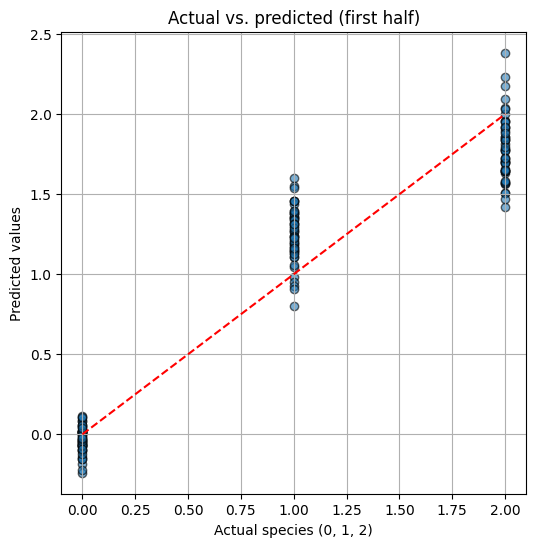

In [17]:
# YOUR CODE HERE

X = df[["sepal-length", "sepal-width", "petal-length", "petal-width"]].values
y = df["target"].values
X_mean = X.mean(axis=0)
X_centered = X - X_mean

cov_matrix = np.cov(X_centered, rowvar=False)
eig_values, eig_vectors = np.linalg.eigh(cov_matrix)
sorted_idx = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_idx]
eig_vectors = eig_vectors[:, sorted_idx]
print("Eigenvalues: ", eig_values)

num_components = X.shape[1] // 2
explained_variance = eig_values / np.sum(eig_values)
explained_first_half = np.sum(explained_variance[:num_components])
print(f"Fraction of data variance explained by first {num_components} components: ", explained_first_half)

top_vectors = eig_vectors[:, :num_components]
X_proj = X_centered @ top_vectors

model_proj = LinearRegression()
model_proj.fit(X_proj, y)
y_pred_proj = model_proj.predict(X_proj)
mse_proj = np.mean((y - y_pred_proj) ** 2)
print("Mean squared error using first half of manually computed PCs: ", mse_proj)

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_proj, alpha=0.6, edgecolor='black')
plt.plot([0, 2], [0, 2], "r--")
plt.xlabel("Actual species (0, 1, 2)")
plt.ylabel("Predicted values")
plt.title("Actual vs. predicted (first half)")
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [20]:
# YOUR CODE HERE

X = df[["sepal-length", "sepal-width", "petal-length", "petal-width"]]
corr_matrix = X.corr()
print(corr_matrix)

              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000


The petal-length and petal-width input columns have the highest correlation as depicted in the above matrix. A negative value in the matrix represents a negative correlation, but can still be strong correlation the closer to -1 they are. The strongest correlation number is the number that is closest to 1 or -1, which is 0.96 in our case, or the correlation between the petal-length and petal-width columns.

The principal components are linear combinations of the original features that maximize variance. When two columns are highly correlated, like the petal-length and petal-width columns, the first principal component matches roughly with the direction of both columns increasing together. Since petal-length and petal-width increase together, principal component 1 is almost a weighted sum of these two features. The second principal component tends to be orthogonal to the first. Since petal-length and petal-width are so strongly correlated, the second principal component captures only minor residual variance in the direction where one increases and the other decreases slightly.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

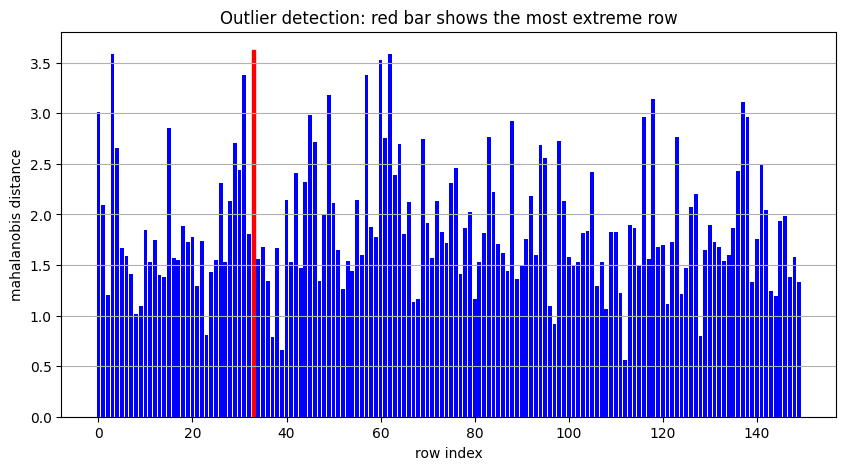

In [ ]:
# YOUR CODE HERE

X = df[["sepal-length", "sepal-width", "petal-length", "petal-width"]].values
mean_vec = np.mean(X, axis=0)
cov_matrix = np.cov(X.T)
cov_inv = np.linalg.inv(cov_matrix)

def mahalanobis(x, mean_vec, inv_cov):
    diff = x - mean_vec
    return np.sqrt(diff.T @ inv_cov @ diff)
distances = np.array([mahalanobis(x, mean_vec, cov_inv) for x in X])
outlier_idx = np.argmax(distances)

plt.figure(figsize=(10,5))
bars = plt.bar(range(len(distances)), distances, color='blue')
bars[outlier_idx].set_color('red')
plt.xlabel("row index")
plt.ylabel("mahalanobis distance")
plt.title("Outlier detection: red bar shows the most extreme row")
plt.grid(axis='y')
plt.show()

Here I used the Mahalanobis distances to find the outlier row. The Mahalanobis distance measures multivariate extremeness, not just univariate deviations. The rows near the mean of all features mean a small distance, while the row with the largest distance represents an extreme in one or multiple features simultaneously. This row sticks out relative to the rest of the data.

Each bar in the bar graph represents a row in the dataset. The height equals the mahalanobis distance from the multivariate center. The red bar is the most extreme row, and the outlier of the dataset.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE